# Final Capstone Project

This final capstone project will be looking at sports betting. 

Using machine learning I want to analyze sports betting odds and create a model to predict the results of games and whether or not a gambler should bet money on the game. This model would be valuable to gamblers who want to make informed bets on sports games.

In [1]:
!pip install hvplot bokeh -U

Requirement already up-to-date: hvplot in /usr/local/lib/python3.6/dist-packages (0.4.0)
Requirement already up-to-date: bokeh in /usr/local/lib/python3.6/dist-packages (1.3.4)


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
sns.set_style('white')

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Data Wrangling

In [4]:
# Import odds
odds_raw = pd.read_csv("/content/gdrive/My Drive/Colab Datasets/BSKB_NBA 3in1_ML_Opening odds_02 June 2019.csv")

odds_raw.head()

YY    DD   MM  ... Unnamed: 29 OT Money Line.2 Unnamed: 31
0     NaN   NaN  NaN  ...         NaN          bet365         NaN
1     NaN   NaN  NaN  ...           A               H           A
2  2019.0  31.0  May  ...        1.88            1.95        1.86
3  2019.0  26.0  May  ...        2.14            1.71        2.20
4  2019.0  24.0  May  ...        3.60            1.33        3.40

[5 rows x 32 columns]

In [5]:
# Import teams
teams_raw = pd.read_csv("/content/gdrive/My Drive/Colab Datasets/nba_team_ratings.csv")

teams_raw.head()

Rk                   Team Conf Div  ...  ORtg/A  DRtg/A  NRtg/A    Seasons
0   1        Milwaukee Bucks    E   C  ...  113.89  106.23    7.66  2018/2019
1   2  Golden State Warriors    W   P  ...  116.60  110.24    6.37  2018/2019
2   3        Toronto Raptors    E   A  ...  113.78  108.40    5.38  2018/2019
3   4              Utah Jazz    W  NW  ...  111.23  105.94    5.28  2018/2019
4   5        Houston Rockets    W  SW  ...  116.45  111.43    5.03  2018/2019

[5 rows x 16 columns]

## About the Data

The first dataset contains the money line odds and final score of NBA games from the 2009-2010 NBA Regular Season through the 2018-2019 NBA Playoffs, up to Game 1 of the NBA Finals. The dataset is from indatabet.com. It is a .csv file I converted over from a .xlsb file. The original file used sub columns under main columns. For example, 'Teams' have both 'Home' and 'Away' teams in separate columns. The same goes for 'Teams ID' having both 'H' (home) and 'A' (away) teams' abbreviations. It also has odds from three different online bookmakers: Matchbook, Pinnacle, and Bet365. I will need to clean the data so that all the columns are on the same level, and remove the columns that are not necessary.

The second dataset contains stats and advanced metrics for each NBA team in a given season. It contains a team's record, offensive rating, defensive rating, net ratings, as well as adjusted ratings.

In [6]:
# Get list of columns
odds_raw.columns

Index(['YY', 'DD', 'MM', 'Kick-off', 'Date of the game', 'Unnamed: 5',
       'Country', 'League', 'Seasons', 'ToG', 'Teams ', 'Unnamed: 11',
       'Teams ID', 'Unnamed: 13', 'FT +OT Scores', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Draw',
       'Unnamed: 21', 'Unnamed: 22', '1 q ', 'Unnamed: 24', 'Unnamed: 25',
       'OT Money Line', 'Unnamed: 27', 'OT Money Line.1', 'Unnamed: 29',
       'OT Money Line.2', 'Unnamed: 31'],
      dtype='object')

In [0]:
# Creating new Data Frame
odds_df = pd.DataFrame
odds_df = odds_raw

In [0]:
# Drop uneccessary columns
odds_df = odds_raw.drop(['Kick-off', 'Date of the game', 'Unnamed: 5', 'Country', 'League', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Draw', 'Unnamed: 21', 'Unnamed: 22', '1 q ', 'Unnamed: 24', 'Unnamed: 25'],  axis=1)

In [0]:
# Rename columns
odds_df.rename(columns={'Teams ': 'Home Team',
                   'Unnamed: 11': 'Away Team',
                   'Teams ID': 'Home ID',
                   'Unnamed: 13': 'Away ID',
                   'FT +OT Scores': 'Home Score',
                   'Unnamed: 15': 'Away Score',
                   'Unnamed: 16': 'Winner',
                   'OT Money Line': 'matchbook H',
                   'Unnamed: 27': 'matchbook A',
                   'OT Money Line.1': 'pinnacle H',
                   'Unnamed: 29': 'pinnacle A',
                   'OT Money Line.2': 'bet365 H',
                   'Unnamed: 31': 'bet365 A'}, inplace=True)

In [0]:
# Remove first two rows which were previously the names of the sub columns
odds_df = odds_df.iloc[2:]

In [11]:
# Check data types and for null values
odds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13689 entries, 2 to 13690
Data columns (total 18 columns):
YY             13689 non-null float64
DD             13689 non-null float64
MM             13689 non-null object
Seasons        13687 non-null object
ToG            13687 non-null object
Home Team      13689 non-null object
Away Team      13689 non-null object
Home ID        13689 non-null object
Away ID        13689 non-null object
Home Score     13689 non-null object
Away Score     13689 non-null object
Winner         13689 non-null object
matchbook H    7894 non-null object
matchbook A    7894 non-null object
pinnacle H     13533 non-null object
pinnacle A     13533 non-null object
bet365 H       13529 non-null object
bet365 A       13529 non-null object
dtypes: float64(2), object(16)
memory usage: 1.9+ MB


In [12]:
# Sum of null values
odds_df.isna().sum()

YY                0
DD                0
MM                0
Seasons           2
ToG               2
Home Team         0
Away Team         0
Home ID           0
Away ID           0
Home Score        0
Away Score        0
Winner            0
matchbook H    5795
matchbook A    5795
pinnacle H      156
pinnacle A      156
bet365 H        160
bet365 A        160
dtype: int64

We do not have the odds of 5,795 games from Matchbook, 156 games from Pinnacle, and 160 games from Bet365. 

In [13]:
# Convert objects to float
odds_df = odds_df.convert_objects(convert_numeric=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [14]:
# Check data types again
odds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13689 entries, 2 to 13690
Data columns (total 18 columns):
YY             13689 non-null float64
DD             13689 non-null float64
MM             13689 non-null object
Seasons        13687 non-null object
ToG            13687 non-null object
Home Team      13689 non-null object
Away Team      13689 non-null object
Home ID        13689 non-null object
Away ID        13689 non-null object
Home Score     13689 non-null int64
Away Score     13689 non-null int64
Winner         13689 non-null object
matchbook H    7894 non-null float64
matchbook A    7894 non-null float64
pinnacle H     13533 non-null float64
pinnacle A     13533 non-null float64
bet365 H       13529 non-null float64
bet365 A       13529 non-null float64
dtypes: float64(8), int64(2), object(8)
memory usage: 1.9+ MB


In [0]:
# Fill NaN with average
odds_df = odds_df.fillna(odds_df.mean())

In [16]:
# Check where null values are
odds_df[odds_df.isna().any(axis=1)]

YY    DD   MM Seasons  ... pinnacle H pinnacle A bet365 H  bet365 A
2823  2017.0  20.0  Apr     NaN  ...   1.940873   3.415933  1.90613  3.253903
3222  2017.0  18.0  Feb     NaN  ...   1.940873   3.415933  1.90613  3.253903

[2 rows x 18 columns]

In [0]:
# Add columns for the average odds of the three different sportsbooks (Matchbook, Pinnacle, and Bet365)
odds_df['AVG H'] = ((odds_df['matchbook H'] + odds_df['pinnacle H'] + odds_df['bet365 H']) / 3)
odds_df['AVG A'] = ((odds_df['matchbook A'] + odds_df['pinnacle A'] + odds_df['bet365 A']) / 3)

In [0]:
# Create variables that makes the Winner and Loser binary
odds_df['Winner_B'] = np.where(odds_df['Winner']=='H', 1, 0)
odds_df['Loser_B'] = np.where(odds_df['Winner']=='A', 1, 0)

In [19]:
odds_df.head()

YY    DD   MM    Seasons  ...     AVG H     AVG A Winner_B Loser_B
2  2019.0  31.0  May  2018/2019  ...  2.006667  1.873333        1       0
3  2019.0  26.0  May  2018/2019  ...  1.716667  2.153333        1       0
4  2019.0  24.0  May  2018/2019  ...  1.320000  3.373333        0       1
5  2019.0  22.0  May  2018/2019  ...  2.140000  1.713333        1       0
6  2019.0  21.0  May  2018/2019  ...  2.300000  1.613333        0       1

[5 rows x 22 columns]

In [20]:
teams_raw.head()

Rk                   Team Conf Div  ...  ORtg/A  DRtg/A  NRtg/A    Seasons
0   1        Milwaukee Bucks    E   C  ...  113.89  106.23    7.66  2018/2019
1   2  Golden State Warriors    W   P  ...  116.60  110.24    6.37  2018/2019
2   3        Toronto Raptors    E   A  ...  113.78  108.40    5.38  2018/2019
3   4              Utah Jazz    W  NW  ...  111.23  105.94    5.28  2018/2019
4   5        Houston Rockets    W  SW  ...  116.45  111.43    5.03  2018/2019

[5 rows x 16 columns]

In [0]:
# Merge the dataframes to include home team metrics
merged = pd.merge(odds_df, 
                        teams_raw[['Team', 'MOV', 'ORtg', 'DRtg', 'NRtg', 'MOV/A', 'ORtg/A', 'DRtg/A', 'NRtg/A', 'Seasons']].rename(columns={
                            'DRtg': 'DRtg_Home',
                            'DRtg/A': 'DRtg/A_Home',
                            'MOV': 'MOV_Home',
                            'MOV/A': 'MOV/A_Home',
                            'NRtg': 'NRtg_Home',
                            'NRtg/A': 'NRtg/A_Home',
                            'ORtg': 'ORtg_Home',
                            'ORtg/A': 'ORtg/A_Home'}),
                        how='left',
                        left_on=('Home Team', 'Seasons'),
                        right_on=('Team', 'Seasons'),
                        suffixes=('', '_this_shouldnt_happen'))

In [0]:
# Merge again to include away team metrics
merged = merged.merge(teams_raw[['Team', 'MOV', 'ORtg', 'DRtg', 'NRtg', 'MOV/A', 'ORtg/A', 'DRtg/A', 'NRtg/A', 'Seasons']].rename(columns={
                            'DRtg': 'DRtg_Away',
                            'DRtg/A': 'DRtg/A_Away',
                            'MOV': 'MOV_Away',
                            'MOV/A': 'MOV/A_Away',
                            'NRtg': 'NRtg_Away',
                            'NRtg/A': 'NRtg/A_Away',
                            'ORtg': 'ORtg_Away',
                            'ORtg/A': 'ORtg/A_Away',}), 
                   how='left',
                   left_on=('Away Team', 'Seasons'),
                   right_on=('Team', 'Seasons'),
                   suffixes=('', '_away_team'))

In [23]:
merged.columns

Index(['YY', 'DD', 'MM', 'Seasons', 'ToG', 'Home Team', 'Away Team', 'Home ID',
       'Away ID', 'Home Score', 'Away Score', 'Winner', 'matchbook H',
       'matchbook A', 'pinnacle H', 'pinnacle A', 'bet365 H', 'bet365 A',
       'AVG H', 'AVG A', 'Winner_B', 'Loser_B', 'Team', 'MOV_Home',
       'ORtg_Home', 'DRtg_Home', 'NRtg_Home', 'MOV/A_Home', 'ORtg/A_Home',
       'DRtg/A_Home', 'NRtg/A_Home', 'Team_away_team', 'MOV_Away', 'ORtg_Away',
       'DRtg_Away', 'NRtg_Away', 'MOV/A_Away', 'ORtg/A_Away', 'DRtg/A_Away',
       'NRtg/A_Away'],
      dtype='object')

In [0]:
# Remove redundant columns for home and away teams
merged = merged.drop(['Team', 'Team_away_team'],  axis='columns')

In [25]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13689 entries, 0 to 13688
Data columns (total 38 columns):
YY             13689 non-null float64
DD             13689 non-null float64
MM             13689 non-null object
Seasons        13687 non-null object
ToG            13687 non-null object
Home Team      13689 non-null object
Away Team      13689 non-null object
Home ID        13689 non-null object
Away ID        13689 non-null object
Home Score     13689 non-null int64
Away Score     13689 non-null int64
Winner         13689 non-null object
matchbook H    13689 non-null float64
matchbook A    13689 non-null float64
pinnacle H     13689 non-null float64
pinnacle A     13689 non-null float64
bet365 H       13689 non-null float64
bet365 A       13689 non-null float64
AVG H          13689 non-null float64
AVG A          13689 non-null float64
Winner_B       13689 non-null int64
Loser_B        13689 non-null int64
MOV_Home       13172 non-null float64
ORtg_Home      13172 non-null flo

In [26]:
# Sum of null values
merged.isna().sum()

YY               0
DD               0
MM               0
Seasons          2
ToG              2
Home Team        0
Away Team        0
Home ID          0
Away ID          0
Home Score       0
Away Score       0
Winner           0
matchbook H      0
matchbook A      0
pinnacle H       0
pinnacle A       0
bet365 H         0
bet365 A         0
AVG H            0
AVG A            0
Winner_B         0
Loser_B          0
MOV_Home       517
ORtg_Home      517
DRtg_Home      517
NRtg_Home      517
MOV/A_Home     517
ORtg/A_Home    517
DRtg/A_Home    517
NRtg/A_Home    517
MOV_Away       521
ORtg_Away      521
DRtg_Away      521
NRtg_Away      521
MOV/A_Away     521
ORtg/A_Away    521
DRtg/A_Away    521
NRtg/A_Away    521
dtype: int64

In [0]:
# Drop NA
merged = merged.dropna()

In [28]:
# Final dataset
merged.head()

YY    DD   MM  ... ORtg/A_Away DRtg/A_Away NRtg/A_Away
0  2019.0  31.0  May  ...      116.60      110.24        6.37
1  2019.0  26.0  May  ...      113.89      106.23        7.66
2  2019.0  24.0  May  ...      113.78      108.40        5.38
3  2019.0  22.0  May  ...      113.89      106.23        7.66
4  2019.0  21.0  May  ...      116.60      110.24        6.37

[5 rows x 38 columns]

##Feature Engineering

In [0]:
# Net rating differential
merged['NRtg_Diff'] = abs(merged['NRtg_Home'] - merged['NRtg_Away'])

# Net rating adjusted differential
merged['NRtg/A_Diff'] = abs(merged['NRtg/A_Home'] - merged['NRtg/A_Away'])

# Margin of victory differential
merged['MOV_Diff'] = abs(merged['MOV_Home'] - merged['MOV_Away'])

In [30]:
merged.head()

YY    DD   MM    Seasons  ... NRtg/A_Away NRtg_Diff NRtg/A_Diff MOV_Diff
0  2019.0  31.0  May  2018/2019  ...        6.37      0.40        0.99     0.37
1  2019.0  26.0  May  2018/2019  ...        7.66      2.48        2.28     2.78
2  2019.0  24.0  May  2018/2019  ...        5.38      2.48        2.28     2.78
3  2019.0  22.0  May  2018/2019  ...        7.66      2.48        2.28     2.78
4  2019.0  21.0  May  2018/2019  ...        6.37      2.01        1.75     2.26

[5 rows x 41 columns]

#Data Exploration

In [31]:
# How many total
merged.shape

(12697, 41)

We have data from 12,697 games over the span of 10 NBA seasons (from 2009 to 2019).

In [32]:
# Summary statistics
merged.describe()

YY            DD  ...   NRtg/A_Diff      MOV_Diff
count  12697.000000  12697.000000  ...  12697.000000  12697.000000
mean    2014.406080     15.428290  ...      5.295001      5.205884
std        2.811672      8.831587  ...      3.881688      3.824080
min     2009.000000      1.000000  ...      0.000000      0.010000
25%     2012.000000      8.000000  ...      2.190000      2.160000
50%     2015.000000     15.000000  ...      4.540000      4.450000
75%     2017.000000     23.000000  ...      7.710000      7.560000
max     2019.000000     31.000000  ...     21.280000     20.990000

[8 rows x 33 columns]

Text(0, 0.5, 'Number of Games')

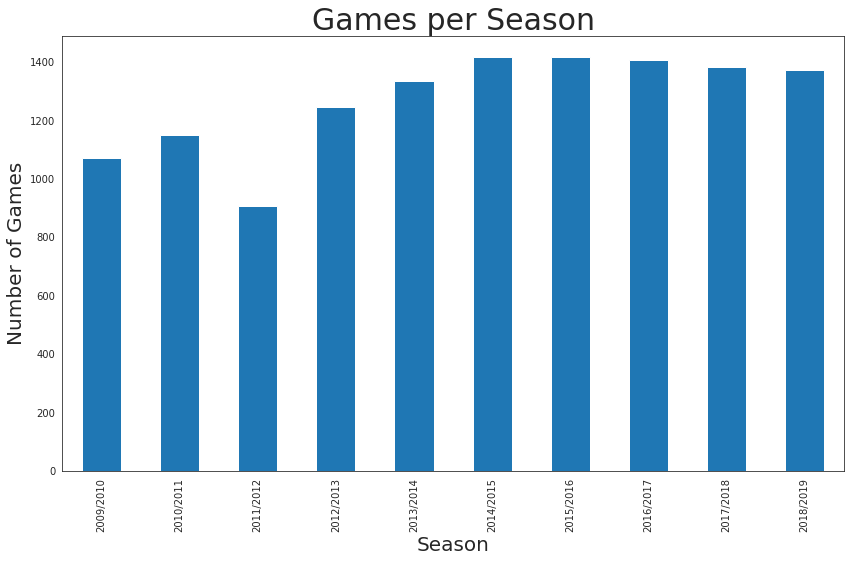

In [33]:
# How many games from each season
b = merged.Seasons.value_counts().reindex(['2009/2010', '2010/2011', '2011/2012', '2012/2013', '2013/2014',
                                  '2014/2015', '2015/2016', '2016/2017', '2017/2018', '2018/2019']).plot(kind="bar",
                                                                                                        figsize=(14,8))
b.axes.set_title("Games per Season",fontsize=30)
b.set_xlabel("Season", fontsize=20)
b.set_ylabel("Number of Games", fontsize=20)

There are 30 teams in the NBA. Each team plays 82 regular season games which comes out to 1230 games total. The amount of playoff games is different every year as some series may require more games to decide the outcome. The 2011/2012 NBA Season was shortend to 66 games due to a lockout. 

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
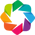

:NdOverlay   [Home Team]
   :Curve   [YY]   (NRtg_Home)

In [34]:
import hvplot.pandas
import holoviews

holoviews.extension('bokeh')

merged.hvplot(x='YY', by='Home Team', y='NRtg_Home', height=950, width=800)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
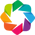

:NdOverlay   [Home Team]
   :Scatter   [YY]   (NRtg_Home)

In [35]:
holoviews.extension('bokeh')

merged.hvplot(x='YY', by='Home Team', y='NRtg_Home', height=800, kind='scatter')

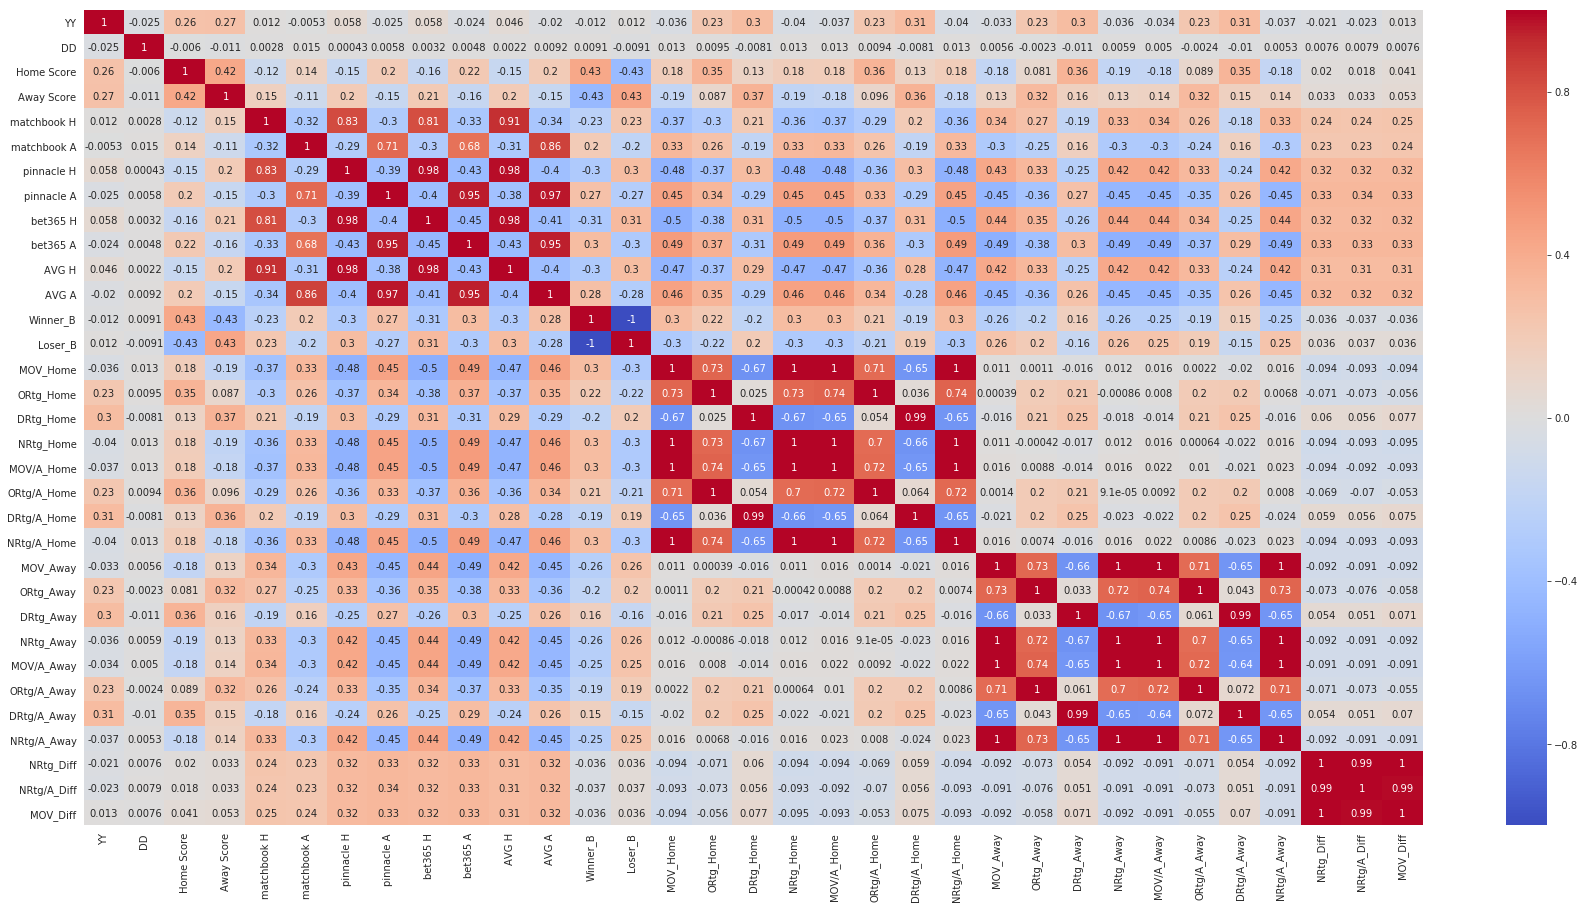

In [36]:
plt.figure(figsize=(30, 15))
sns.heatmap(merged.corr(), cmap='coolwarm', annot=True)

# Models

In [0]:
# Split data

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = pd.get_dummies(
    merged.drop(
        [
            "MM",
            "DD",
            "Winner_B",
            "Loser_B",
            "Winner",
            "matchbook H",
            "matchbook A",
            "pinnacle H",
            "pinnacle A",
            "bet365 H",
            "bet365 A",
            "Home Score",
            "Away Score"
        ],
        axis='columns',
    )
    , drop_first=True
)
Y = merged["Winner_B"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(solver='lbfgs', multi_class='auto')
logr.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
print('Logistic Regression Scores')
print('Training score: ', logr.score(X_train, Y_train))
print('Test score: ', logr.score(X_test, Y_test))

Logistic Regression Scores
Training score:  0.6933723416225948
Test score:  0.6721784776902887


In [40]:
y_pred = logr.fit(X_train, Y_train).predict(X)

from sklearn.metrics import confusion_matrix
confusion_matrix(Y, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


array([[2667, 2518],
       [1456, 6056]])

In [41]:
from sklearn.model_selection import cross_val_score
cross_val_score(logr, X, Y, cv=10)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local

array([0.68686074, 0.68607396, 0.67086614, 0.69685039, 0.68188976,
       0.68636722, 0.6855792 , 0.66745469, 0.71394799, 0.68636722])

### Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [43]:
print('Decision Tree Scores')
print('Training score: ', tree.score(X_train, Y_train))
print('Test score: ', tree.score(X_test, Y_test))

Decision Tree Scores
Training score:  1.0
Test score:  0.5700787401574803


In [44]:
# See which features are most important
tree_features = pd.Series(data=tree.feature_importances_, index=X_train.columns)
tree_features.sort_values(ascending=False)

AVG H                               0.204346
AVG A                               0.124765
NRtg/A_Diff                         0.073055
NRtg_Diff                           0.046162
MOV_Diff                            0.044967
YY                                  0.027201
DRtg/A_Away                         0.026480
DRtg_Home                           0.025573
DRtg/A_Home                         0.024761
ORtg/A_Away                         0.022391
MOV_Away                            0.021310
ORtg_Away                           0.021142
NRtg/A_Home                         0.019061
ORtg_Home                           0.018842
DRtg_Away                           0.018627
MOV/A_Away                          0.018222
NRtg/A_Away                         0.017479
ORtg/A_Home                         0.016969
MOV/A_Home                          0.015696
NRtg_Home                           0.015020
MOV_Home                            0.014623
NRtg_Away                           0.012261
ToG_Regula

In [45]:
y_pred = tree.fit(X_train, Y_train).predict(X)

confusion_matrix(Y, y_pred)

array([[4418,  767],
       [ 840, 6672]])

In [46]:
cross_val_score(tree, X, Y, cv=10)

array([0.5743509 , 0.58693942, 0.5519685 , 0.60944882, 0.59527559,
       0.58156028, 0.55240347, 0.56185973, 0.58786446, 0.58628842])

### Random Forest

In [47]:
from sklearn import ensemble

rfc = ensemble.RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
print('Random Forest Scores')
print('Training score: ', rfc.score(X_train, Y_train))
print('Test score: ', rfc.score(X_test, Y_test))

Random Forest Scores
Training score:  1.0
Test score:  0.6304461942257218


In [49]:
# See which features are most important
rfc_features = pd.Series(data=rfc.feature_importances_, index=X_train.columns)
rfc_features.sort_values(ascending=False)

AVG H                              0.098088
AVG A                              0.097182
NRtg/A_Diff                        0.039625
NRtg_Diff                          0.039263
MOV_Diff                           0.038674
MOV/A_Home                         0.033961
NRtg/A_Home                        0.033832
NRtg_Home                          0.033639
MOV_Home                           0.033551
MOV_Away                           0.030704
NRtg/A_Away                        0.030460
NRtg_Away                          0.030346
MOV/A_Away                         0.029613
ORtg_Home                          0.027153
ORtg/A_Home                        0.027054
ORtg_Away                          0.026770
YY                                 0.026468
ORtg/A_Away                        0.025922
DRtg_Away                          0.025857
DRtg_Home                          0.025346
DRtg/A_Away                        0.025251
DRtg/A_Home                        0.024817
ToG_Regular                     

In [50]:
y_pred = rfc.fit(X_train, Y_train).predict(X)

confusion_matrix(Y, y_pred)

array([[4443,  742],
       [ 666, 6846]])

In [51]:
cross_val_score(rfc, X, Y, cv=10)

array([0.66325728, 0.66640441, 0.64724409, 0.66299213, 0.63937008,
       0.63435776, 0.62647754, 0.60677699, 0.66903073, 0.6713948 ])

### KNN

In [52]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=2, weights='distance')
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='distance')

In [53]:
print('KNN Scores. K = 2')
print('Training score: ', knn.score(X_train, Y_train))
print('Test score: ', knn.score(X_test, Y_test))

KNN Scores. K = 2
Training score:  1.0
Test score:  0.5766404199475066


In [54]:
knn = neighbors.KNeighborsClassifier(n_neighbors=10, weights='distance')
knn.fit(X_train, Y_train)

print('KNN Scores. K = 10')
print('Training score: ', knn.score(X_train, Y_train))
print('Test score: ', knn.score(X_test, Y_test))

KNN Scores. K = 10
Training score:  1.0
Test score:  0.6362204724409449


In [55]:
knn = neighbors.KNeighborsClassifier(n_neighbors=20, weights='distance')
knn.fit(X_train, Y_train)

print('KNN Scores. K = 20')
print('Training score: ', knn.score(X_train, Y_train))
print('Test score: ', knn.score(X_test, Y_test))

KNN Scores. K = 20
Training score:  1.0
Test score:  0.6493438320209973


In [56]:
y_pred = knn.fit(X_train, Y_train).predict(X)

confusion_matrix(Y, y_pred)

array([[4469,  716],
       [ 620, 6892]])

In [57]:
cross_val_score(knn, X, Y, cv=10)

array([0.67269866, 0.66011015, 0.6519685 , 0.66692913, 0.66535433,
       0.6713948 , 0.66824271, 0.64854216, 0.67612293, 0.65878645])

###XGBoost

In [58]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [59]:
print('XGBoost Scores')
print('Training score: ', xgb.score(X_train, Y_train))
print('Test score: ', xgb.score(X_test, Y_test))

XGBoost Scores
Training score:  0.7122763587262293
Test score:  0.6742782152230972


In [60]:
# See which features are most important
xgb_features = pd.Series(data=xgb.feature_importances_, index=X_train.columns)
xgb_features.sort_values(ascending=False)

AVG H                               0.159741
AVG A                               0.087032
NRtg/A_Diff                         0.058799
MOV/A_Home                          0.039602
NRtg/A_Away                         0.036223
NRtg_Diff                           0.031644
MOV/A_Away                          0.027176
NRtg_Home                           0.025753
Away Team_Dallas Mavericks          0.019791
MOV_Home                            0.018558
NRtg_Away                           0.018404
Home Team_Brooklyn Nets             0.018255
NRtg/A_Home                         0.017673
MOV_Diff                            0.017503
MOV_Away                            0.017053
Away Team_Philadelphia 76ers        0.016533
Away Team_Oklahoma City Thunder     0.015348
Away Team_Los Angeles Clippers      0.015215
Home Team_Miami Heat                0.013821
Home Team_Philadelphia 76ers        0.013717
DRtg_Away                           0.013072
Seasons_2015/2016                   0.012477
DRtg/A_Awa

In [61]:
y_pred = xgb.fit(X_train, Y_train).predict(X)

confusion_matrix(Y, y_pred)

array([[2695, 2490],
       [1308, 6204]])

In [62]:
cross_val_score(xgb, X, Y, cv=10)

array([0.67899292, 0.68056648, 0.66614173, 0.7015748 , 0.64409449,
       0.64144996, 0.62884161, 0.63750985, 0.69739953, 0.68715524])

### Neural Network (Multi Layer Perceptron)

In [63]:
import tensorflow as tf
import keras
from keras import backend as K
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [0]:
Y = merged[["Winner_B", "Loser_B"]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [65]:
from keras.models import Sequential

# Start with a simple sequential model
model = Sequential()

# Add dense layers to create a fully connected MLP
model.add(Dense(64, activation='relu', input_shape=(149,)))

# Dropout layers remove features and fight overfitting
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2, activation='softmax'))

model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                9600      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_______________________________________________________________

In [66]:
history = model.fit(X_train, Y_train,
                    batch_size=128,
                    epochs=50,
                    verbose=1,
                    validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 8887 samples, validate on 3810 samples
Epoch 1/50
8887/8887 [==============================] - 1s 155us/step - loss: 6.6106 - acc: 0.5841 - val_loss: 6.4769 - val_acc: 0.5982
Epoch 2/50
8887/8887 [==============================] - 0s 34us/step - loss: 6.6310 - acc: 0.5885 - val_loss: 6.4769 - val_acc: 0.5982
Epoch 3/50
8887/8887 [==============================] - 0s 30us/step - loss: 6.6272 - acc: 0.5888 - val_loss: 6.4769 - val_acc: 0.5982
Epoch 4/50
8887/8887 [==============================] - 0s 37us/step - loss: 6.6272 - acc: 0.5888 - val_loss: 6.4769 - val_acc: 0.5982
Epoch 5/50
8887/8887 [==============================] - 0s 31us/step - loss: 6.6631 - acc: 0.5812 - val_loss: 6.4769 - val_acc: 0.5982
Epoch 6/50
8887/8887 [==============================] - 0s 32us/step - loss: 6.6080 - acc: 0.5690 - val_loss: 6.4769 - val_acc: 0.5982
Epoch 7/50
8887/8887 [=========================

#Feature Importances

In [0]:
tree_importance = tree.feature_importances_
rfc_importance = rfc.feature_importances_
xgb_importance = xgb.feature_importances_

tree_importance = 100.0 * (tree_importance / tree_importance.sum())
rfc_importance = 100.0 * (rfc_importance / rfc_importance.sum())
xgb_importance = 100.0 * (xgb_importance / xgb_importance.sum())


tree_df = pd.DataFrame(data={'Percent_Importance':tree_importance, 'Feature':X_train.columns})
tree_df.sort_values('Percent_Importance', axis=0, ascending=False, inplace=True)

rfc_df = pd.DataFrame(data={'Percent_Importance':rfc_importance, 'Feature':X_train.columns})
rfc_df.sort_values('Percent_Importance', axis=0, ascending=False, inplace=True)

xgb_df = pd.DataFrame(data={'Percent_Importance':xgb_importance, 'Feature':X_train.columns})
xgb_df.sort_values('Percent_Importance', axis=0, ascending=False, inplace=True)

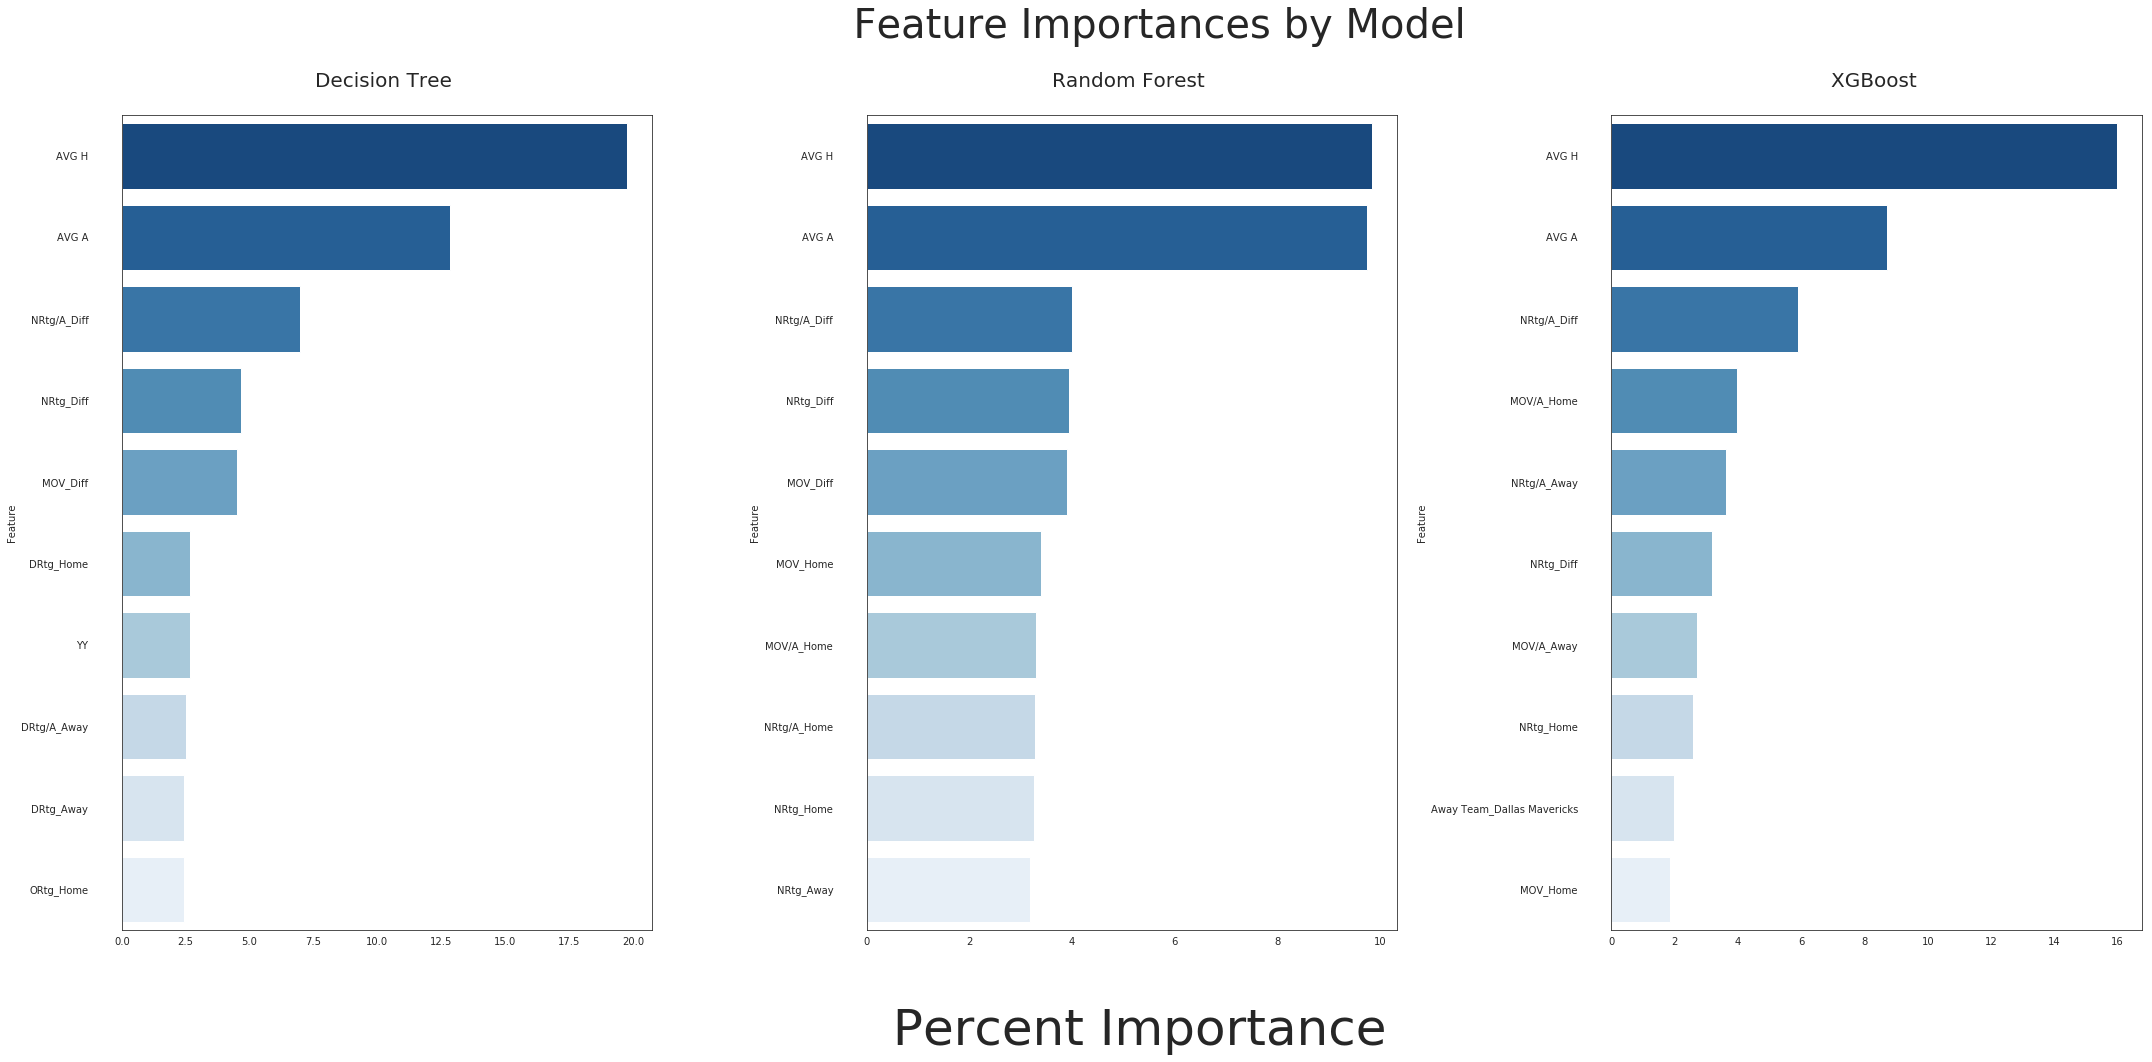

In [68]:
f, ax = plt.subplots(figsize=(30,15))

ax1 = plt.subplot(1, 3, 1)
sns.barplot(y='Feature', x='Percent_Importance', data=tree_df.iloc[:10,:], palette='Blues_r')
plt.xlabel('')
ax1.tick_params(axis='y', which='major', pad=30)
plt.title('Decision Tree \n', fontsize=20)

ax2 = plt.subplot(1, 3, 2)
sns.barplot(y='Feature', x='Percent_Importance', data=rfc_df.iloc[:10,:], palette='Blues_r')
plt.xlabel('\n Percent Importance', fontsize=50)
ax2.tick_params(axis='y', which='major', pad=30)
plt.title('Random Forest \n', fontsize=20)

ax3 = plt.subplot(1, 3, 3)
sns.barplot(y='Feature', x='Percent_Importance', data=xgb_df.iloc[:10,:], palette='Blues_r')
plt.xlabel('')
ax3.tick_params(axis='y', which='major', pad=30)
plt.title('XGBoost \n', fontsize=20)

plt.tight_layout()
plt.suptitle('              Feature Importances by Model \n', fontsize=40)
plt.subplots_adjust(top=0.88)
plt.show()

#Conclusion

The accuracy scores across the models attempted were all similar. The neural network did not perform well compared to the others. Given the dataset, we are able to predict the winners of NBA games with around 65-70% accuracy. The most important features in predicting a winner were adjusted team ratings. Someone can use this model and information to bet on the moneyline odds for NBA games. 

In an effort to improve these models, we could use more data. Moneyline odds tend to change depending on who is playing in the game. For example, a team might be missing their best player, causing the odds to move in the direction of favoring the opposing team. In other words, we would want data on the players that play in the games. We could also use different advanced metrics, such as team tendencies and playstyles. 